In [1]:
import cv2
import matplotlib.pyplot as plt

# Load Model

In [2]:
configFile = 'config-mobilenet v3\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'ssd_mobilenet_v3_large_coco_2020_01_14\\ssd_mobilenet_v3_large_coco_2020_01_14\\frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozen_model, configFile)

In [4]:
classList = []
Labels = 'Labels.txt'
with open(Labels) as input:
    classList = input.read().splitlines()

In [5]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean(127.5)
model.setInputSwapRB(True)

<dnn_Model 0000017CA7E29110>

# Load Image

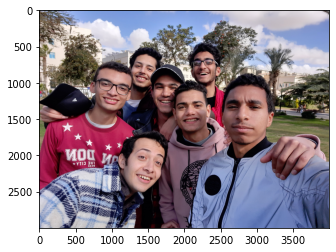

In [6]:
img = cv2.imread('Images/photo2.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
imgSize = tuple(img.shape[1::-1])
imgReSize = (int(imgSize[0]/5), int(imgSize[1]/5))

# Object Detection On Image

In [7]:
classIndex, confidence, box = model.detect(img, confThreshold=0.5)

In [8]:
fontSize = 10
font = cv2.FONT_HERSHEY_PLAIN

for ClassItem, conf, classBox in zip(classIndex, confidence, box):
    if ClassItem > 80:
        continue
    print("Class: " + str(classList[ClassItem- 1]) + ", Confidence: " + str(conf * 100) + "%")
    cv2.rectangle(img, classBox, (0,0,0), 10)
    cv2.putText(img, classList[ClassItem- 1], (classBox[0]+10, classBox[1]+100), font, fontSize, (0,0,255), thickness=10)

img = cv2.resize(img, imgReSize)
cv2.imshow("Objects: ",img)
cv2.waitKey(0) 
cv2.destroyAllWindows() 


Class: person, Confidence: 77.02162265777588%
Class: person, Confidence: 73.69080781936646%
Class: person, Confidence: 71.01842164993286%
Class: person, Confidence: 65.72496891021729%
Class: person, Confidence: 64.68899250030518%
Class: person, Confidence: 58.64444971084595%
Class: person, Confidence: 55.97201585769653%
Class: person, Confidence: 54.4497013092041%


# Object Detection On Video 

In [9]:
video = cv2.VideoCapture('Videos/People walking in the city.mp4')

# validate file
if not video.isOpened():
    raise IOError('Cannot open file')

fontSize = 2
font = cv2.FONT_HERSHEY_PLAIN

while True:
    _, frame = video.read()

    classIndex, confidence, box = model.detect(frame, confThreshold=0.5)

    if len(classIndex) != 0:
        for ClassItem, conf, classBox in zip(classIndex, confidence, box):
            if ClassItem > 80:
                continue
            print("Class: " + str(classList[ClassItem- 1]) + ", Confidence: " + str(conf * 100) + "%")
            cv2.rectangle(frame, classBox, (0,0,0), 2)
            cv2.putText(frame, classList[ClassItem- 1], (classBox[0]+10, classBox[1]+40), font, fontSize, (0,0,255), thickness=2)

    cv2.imshow("Objects: ", frame)

    print('frame')

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
    
video.release()
cv2.destroyAllWindows() 


Class: person, Confidence: 61.25307083129883%
Class: train, Confidence: 57.83122181892395%
Class: person, Confidence: 56.10688924789429%
Class: person, Confidence: 55.64098358154297%
Class: person, Confidence: 51.38846039772034%
frame
Class: person, Confidence: 63.406383991241455%
Class: train, Confidence: 62.82569766044617%
Class: person, Confidence: 57.586658000946045%
Class: person, Confidence: 56.36504888534546%
Class: person, Confidence: 53.69400978088379%
Class: person, Confidence: 51.07187032699585%
Class: person, Confidence: 50.55498480796814%
frame
Class: person, Confidence: 64.34300541877747%
Class: train, Confidence: 62.482112646102905%
Class: person, Confidence: 57.29694366455078%
Class: person, Confidence: 55.47054409980774%
Class: person, Confidence: 52.108144760131836%
Class: person, Confidence: 51.00279450416565%
frame
Class: person, Confidence: 65.5825138092041%
Class: train, Confidence: 62.26544380187988%
Class: person, Confidence: 57.05151557922363%
Class: person, Co